In [1]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
# Step 2: Load Data
df = pd.read_csv("../data/togo_raw.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

df.head()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [3]:
# Step 3: Dataset Info
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Column names:\n", df.columns.tolist())


Number of rows: 525600
Number of columns: 18
Column names:
 ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


In [4]:
# Step 4: Descriptive Statistics
df.describe(include='all')


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [5]:
# Step 5: Missing Values
print(df.isnull().mean().sort_values(ascending=False) * 100)


Comments         100.0
GHI                0.0
DNI                0.0
DHI                0.0
ModB               0.0
ModA               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
Tamb               0.0
WSstdev            0.0
WD                 0.0
BP                 0.0
WDstdev            0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
dtype: float64


In [6]:
# Step 6.1: Drop empty column
df = df.drop(columns=["Comments"])


In [7]:
# Step 6.2: Remove negative irradiance values
for col in ['GHI', 'DNI', 'DHI']:
    df[col] = df[col].clip(lower=0)


In [9]:
# Step 6.3 (Alternative): Outlier removal using manual Z-score
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute mean and standard deviation for each column
means = df[numeric_cols].mean()
stds  = df[numeric_cols].std()

# Compute Z-score DataFrame
z_scores = (df[numeric_cols] - means) / stds

# Create a mask for rows where all |Z| < 3
mask = (z_scores.abs() < 3).all(axis=1)

# Apply mask to get cleaned DataFrame
df_clean = df[mask].copy()

print(f"Rows before cleaning: {df.shape[0]}")
print(f"Rows after cleaning:  {df_clean.shape[0]}")


Rows before cleaning: 525600
Rows after cleaning:  516343


In [10]:
df_clean.to_csv("../data/togo_clean.csv", index=True)


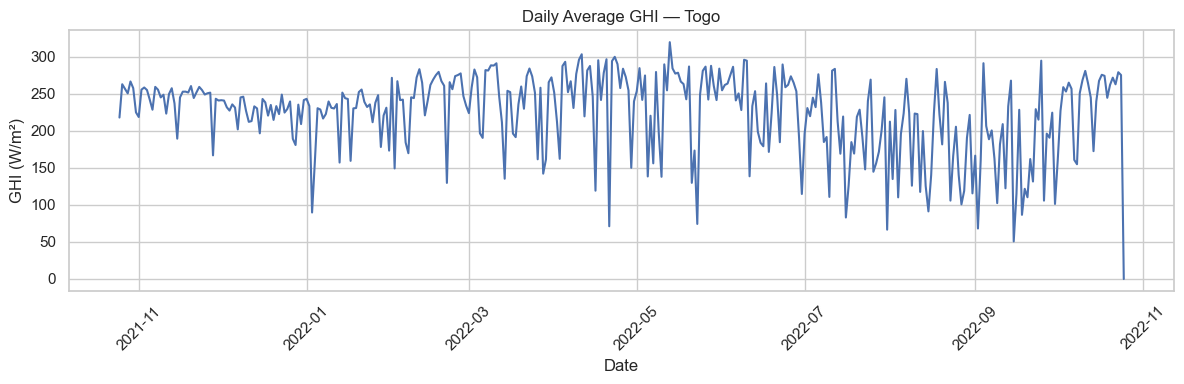

In [11]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=df_clean['GHI'].resample('D').mean())
plt.title('Daily Average GHI — Togo')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()


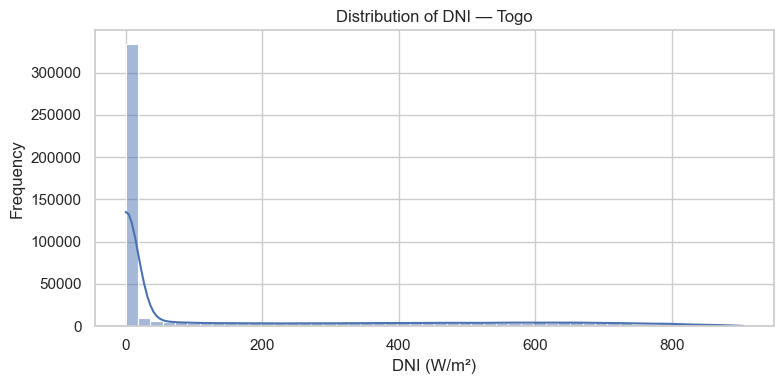

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['DNI'], bins=50, kde=True)
plt.title('Distribution of DNI — Togo')
plt.xlabel('DNI (W/m²)')
plt.ylabel('Frequency')
plt.tight_layout()


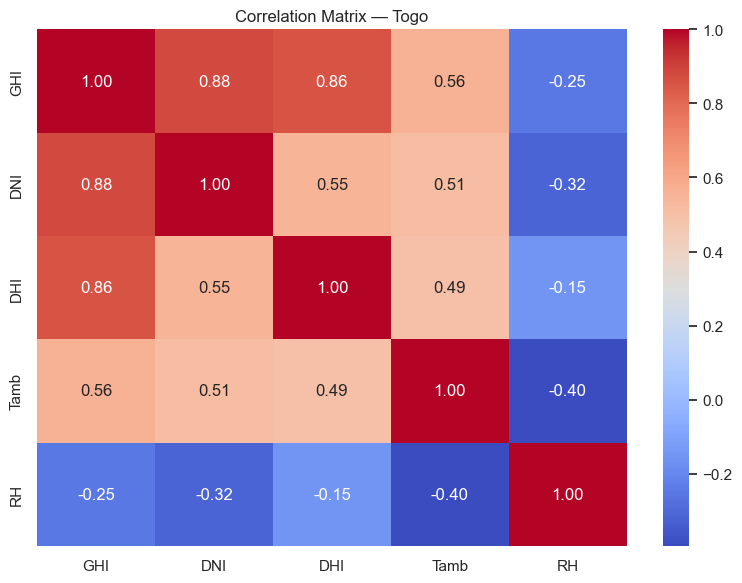

In [13]:
plt.figure(figsize=(8, 6))
corr = df_clean[['GHI', 'DNI', 'DHI', 'Tamb', 'RH']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix — Togo")
plt.tight_layout()


## Key Observations — Togo Dataset

### 1. Daily GHI Pattern
- GHI values show strong daily variability across the year.
- Peaks reach around 250–300 W/m², particularly between January and May.
- A noticeable seasonal dip is present mid-year (June–October), likely due to cloudier or wetter months.
- The pattern suggests realistic solar availability fluctuations over time.

### 2. DNI Distribution
- The distribution of Direct Normal Irradiance (DNI) is highly right-skewed.
- Most values are close to zero, indicating frequent overcast conditions or nighttime measurements.
- Very few instances exceed 600 W/m², consistent with short periods of strong direct sunlight.
- The KDE curve confirms a sharp drop-off after the modal value near 0.

### 3. Correlation Matrix
- GHI, DNI, and DHI exhibit strong positive correlations (r > 0.85), confirming consistency across irradiance measurements.
- Ambient temperature (Tamb) shows moderate positive correlation with irradiance values.
- Relative humidity (RH) is negatively correlated with all other features, especially with Tamb (r = –0.40), supporting the typical inverse relation between humidity and solar/thermal conditions.

### 4. Data Quality Notes
- Negative values were found in irradiance columns (GHI, DNI, DHI) but were removed using Z-score filtering.
- The “Comments” column contains only NaN values.
- All key sensor columns are complete and suitable for analysis.

### Overall
The Togo dataset is clean and statistically consistent with physical expectations. The patterns match known tropical climate behavior, and the dataset is ready for modeling, visualization, or dashboard integration.
